# Learning XOR function with ReLU
## Deep Learning, 6.1, p. 166

After demonstrating that linear regression can't approximate XOR accuratly, the book proposes a solution with one hidden layer with 2 units, using the Rectified Linear Unit (ReLU) as activation function. This function is applied element-wise and is basically the function y = max(0, x). This is followed by an output layer (1 unit) which is a simple linear regression.

Here I implement this model and apply gradient descent as done with the previous notebook.
### Results
The book gives the value of weights and biases to reach a perfect approximation of XOR (p.170).
Running a gradient descend with those parameters confirms the solution.

That said, I also run GD (learning rate=0.25) with weights chosen on a truncated normal distribution N(x <2.0, 0, 1) and biases set to 0. The result seems stuck to local optimums. I tried to vary the learning rate as it's the only hyperparameter in the model so far.
The result shown in the graph is kind of irregular and certainly beyond my comprehension so far.
Maybe regularization techniques or methods to pick rights initial parameters would help.

In [1]:
import tensorflow as tf
import numpy as np
import sys
import matplotlib.pyplot as plt

In [2]:
log_path = "./logs-nb2"
data = np.array([[0,0],[0,1],[1,0],[1,1]], np.float32)
label = np.array([0,1,1,0],np.float32)
weight_hidden_sol = np.array([[1,1],[1,1]], np.float32)
weight_out_sol = np.array([[1],[-2]], np.float32)
bias_hidden_sol = np.array([[0],[-1]], np.float32)
bias_out_sol = np.array([[0]], np.float32)

In [3]:
tf.reset_default_graph()
# That function is too big. I wished to separate the graph building from the GD iterations
# but I don't know yet how to return a graph and extract tensors from it (to be passed to session.run)
def process(learning_rate, given_solution=False):
    # GRAPH DEFINITION
    # Imported data
    with tf.name_scope("Inputs"):
        tf_data = tf.constant(data, name="data")
        tf_label = tf.constant(label, shape=(4,1), name="labels")
    # Variables
    with tf.name_scope("Weights"):
        if given_solution:
            weights_hidden = tf.Variable(weight_hidden_sol, name="weights_hidden")
            weights_out = tf.Variable(weight_out_sol, name="weights_out")
        else:
            weights_hidden = tf.Variable(tf.truncated_normal([2, 2], dtype=tf.float32), name="weights_hidden")
            weights_out = tf.Variable(tf.truncated_normal([2, 1], dtype=tf.float32), name="weights_out")
    with tf.name_scope("Bias"):
        if given_solution:
            bias_hidden = tf.Variable(bias_hidden_sol.transpose(), name="bias_hidden")
            bias_out = tf.Variable(bias_out_sol, name="bias_out")
        else:
            bias_hidden = tf.Variable(tf.zeros([1,2], dtype=tf.float32), name="bias_hidden")
            bias_out = tf.Variable(tf.zeros([], dtype=tf.float32), name="bias_out")
    # layers
    with tf.name_scope("Hidden_layer"):
        hidden = tf.nn.relu(tf.matmul(tf_data, weights_hidden) + bias_hidden)
    with tf.name_scope("Output_layer"):
        output = tf.matmul(hidden, weights_out) + bias_out
    # loss function
    with tf.name_scope("Loss_function"):
        loss = tf.reduce_mean(tf.pow(tf_label - output, 2), 0)
    # Gradient descent
    with tf.name_scope("Optimizer"):
        optimizer = tf.train.GradientDescentOptimizer(1.0).minimize(loss)
    # SUMMARY
    writer = tf.summary.FileWriter(log_path, graph=tf.get_default_graph())
    tf.summary.scalar("loss", loss[0])
    summary_op = tf.summary.merge_all()
    # GD EXEC
    nb_steps = 10001
    with tf.Session() as session:
        tf.global_variables_initializer().run()
        for step in range(nb_steps):
            _, l, summary = session.run([optimizer, loss, summary_op])
            writer.add_summary(summary, step)
            if step % 100 == 0:
                sys.stdout.write(".")
    print()
    return l

In [4]:
#GENERATE DATA
print('process with given params')
loss_given_params = process(0.25, True)
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1, 10]
losses = []
for lr in learning_rates:
    print ('process learning rate: {}'.format(lr))
    losses.append(process(lr, False))
print("done")

process with given params
.....................................................................................................
process learning rate: 0.0001
.....................................................................................................
process learning rate: 0.001
.....................................................................................................
process learning rate: 0.01
.....................................................................................................
process learning rate: 0.1
.....................................................................................................
process learning rate: 1
.....................................................................................................
process learning rate: 10
.....................................................................................................
done


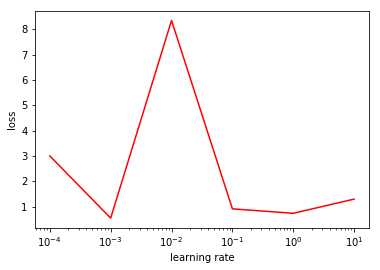

In [7]:
plt.semilogx(learning_rates, losses, 'r-')
plt.ylabel('loss')
plt.xlabel('learning rate')
plt.show()

In [8]:
print('loss with given weights and biases: {}'.format(loss_given_params))

loss with given weights and biases: [ 0.]
